<a href="https://colab.research.google.com/github/bhogasena/ML_Algorithems/blob/main/Gradient_Descent_Multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
df = pd.read_csv('advertising.csv')
df.head()
df.shape

(200, 4)

# Normalize the data

In [78]:
df = (df-df.mean())/df.std()
df.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


### Create feature variables and output variables in x and y

In [79]:
x = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [80]:
x['intercept'] =1 
x = x.reindex(['intercept','TV','Radio','Newspaper'], axis=1)

In [81]:
x.head()

,intercept,TV,Radio,Newspaper
0,1,0.967425,0.979066,1.774493
1,1,-1.194379,1.080097,0.667903
2,1,-1.512360,1.524637,1.779084
3,1,0.051919,1.214806,1.283185
4,1,0.393196,-0.839507,1.278593


In [82]:
X = np.array(x)
Y = np.array(y)

In [83]:
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 1000

In [84]:
def compute_cost(X, Y, theta):
  return np.sum(np.square(np.matmul(X,theta) - Y))/(2*len(X))

In [85]:
def gradient_descent_multi(X, Y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [86]:
gradient_descent_multi(X, Y, theta, alpha, iterations)

,Bets,cost
0,"[-5.417888360170764e-18, 0.007783133027372984,...",0.487696
1,"[-1.0569323194431491e-17, 0.015484416820036633...",0.478118
2,"[-1.5631940186722205e-17, 0.023104730166288424...",0.468760
3,"[-2.0250467969162856e-17, 0.03064494219118504,...",0.459617
4,"[-2.4780177909633495e-17, 0.03810591246562723,...",0.450683
...,...,...
995,"[2.6407764863733747e-16, 0.7530275184009089, 0...",0.051138
996,"[2.6409985309782997e-16, 0.7530278865846947, 0...",0.051138
997,"[2.6405544417684497e-16, 0.7530282512106896, 0...",0.051138
998,"[2.6396662633487497e-16, 0.7530286123134639, 0...",0.051138


In [90]:
gradient_descent_multi(X, Y, theta, alpha, iterations).values[999]

array([array([ 2.63877808e-16,  7.53028970e-01,  5.36055111e-01, -3.89429686e-03]),
       0.0511378277805789], dtype=object)

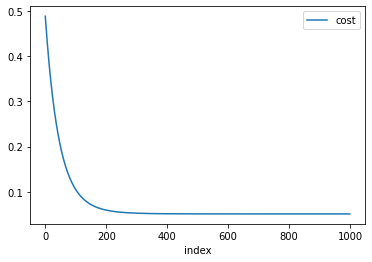

In [89]:
gradient_descent_multi(X, Y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])